# Regressão linear múltipla

## Objetivos

Depois de concluir este laboratório, você será capaz de:

Use scikit-learn para implementar regressão linear múltipla

Crie um modelo, treine-o, teste-o e use o modelo

### Importando pacotes necessários

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

%matplotlib inline

## Compreendendo os dados

###### FuelConsumption.csv:

Baixamos um conjunto de dados de consumo de combustível, FuelConsumption.csv, que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para veículos leves novos para venda no varejo no Canadá. Fonte do conjunto de dados

MODELYEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

## Lendo os dados

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# Verificar o dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Vamos representar graficamente os valores de emissão em relação ao tamanho do motor

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


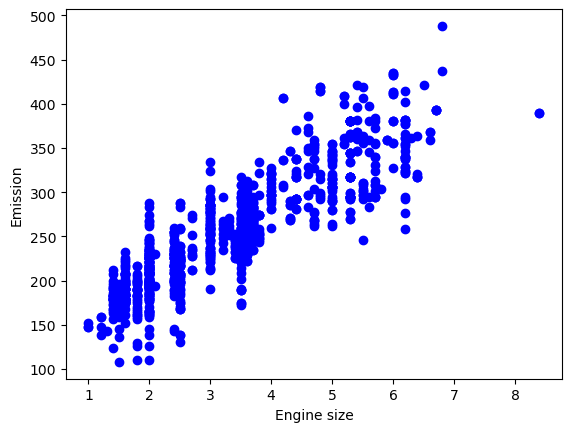

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

## Criando conjunto de dados de treinamento e teste

A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de testes. Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados.

Conhecemos o resultado de cada ponto de dados no conjunto de dados de teste, o que torna ótimo o teste! Como esses dados não foram usados ​​para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. Cerca de 80% de todo o conjunto de dados será usado para treinamento e 20% para teste. Criamos uma máscara para selecionar linhas aleatórias usando a função np.random.rand():

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Treinar distribuição de dados

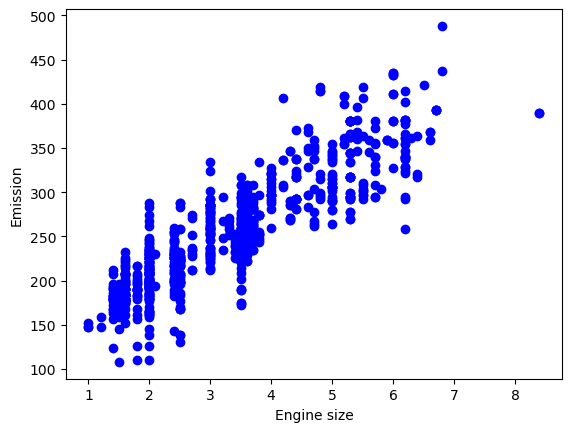

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Modelo de regressão múltipla

Na realidade, existem múltiplas variáveis ​​que impactam a emissão de co2. Quando mais de uma variável independente está presente, o processo é denominado regressão linear múltipla. Um exemplo de regressão linear múltipla é a previsão da emissão de co2 utilizando os recursos FUELCONSUMPTION_COMB, EngineSize e Cilindros dos carros. O bom aqui é que o modelo de regressão linear múltipla é a extensão do modelo de regressão linear simples.

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[12.08378847  6.97057606  9.37541534]]


Como mencionado anteriormente, Coeficiente e Interceptação são os parâmetros da linha ajustada. Dado que se trata de um modelo de regressão linear múltipla com 3 parâmetros e que os parâmetros são o intercepto e os coeficientes do hiperplano, o sklearn pode estimá-los a partir de nossos dados. Scikit-learn usa o método simples de Mínimos Quadrados Ordinários para resolver este problema.

Mínimos Quadrados Ordinários (OLS)
OLS é um método para estimar os parâmetros desconhecidos em um modelo de regressão linear. OLS escolhe os parâmetros de uma função linear de um conjunto de variáveis ​​explicativas minimizando a soma dos quadrados das diferenças entre a variável dependente alvo e aquelas previstas pela função linear. Em outras palavras, ele tenta minimizar a soma dos erros quadráticos (SSE) ou erro quadrático médio (MSE) entre a variável alvo (y) e nossa saída prevista ( 𝑦̂
 ) em todas as amostras no conjunto de dados.

O OLS pode encontrar os melhores parâmetros usando os seguintes métodos:

Resolvendo os parâmetros do modelo analiticamente usando equações de forma fechada
Usando um algoritmo de otimização (Gradient Descent, Stochastic Gradient Descent, Método de Newton, etc.)

## Predição

In [10]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 578.51
Variance score: 0.86


C:\Users\igf_i\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


__Pontuação de regressão de variância explicada::__  
Seja $\hat{y}$ o resultado alvo estimado, y o resultado alvo correspondente (correto) e Var seja a Variância (o quadrado do desvio padrão). Então a variância explicada é estimada da seguinte forma::

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$

A melhor pontuação possível é 1,0, os valores mais baixos são piores.

## Exercício

Tente usar uma regressão linear múltipla com o mesmo conjunto de dados, mas desta vez use FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY em vez de FUELCONSUMPTION_COMB. Isso resulta em melhor precisão?

In [11]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[12.21767819  6.44804049  6.37878149  2.62423268]]
Residual sum of squares: 582.71
Variance score: 0.86


C:\Users\igf_i\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
